### Данные взяты с https://www.kaggle.com/datasets/ifuurh/nasdaq100-fundamental-data. Датасет показывает 45 финансовых показателей/коэффициентов для составляющих индекса Nasdaq 100 за 2017-2022 годы.
- Задача проекта: Проект включает в себя задачи машинного обучения, такие как регрессия и тюнинг гиперпараметров для моделей.

- Использованные модели: В проекте были использованы различные модели, такие как линейная регрессия, градиентный бустинг и случайный лес. Также проведен тюнинг гиперпараметров для случайного леса с использованием GridSearchCV и RandomizedSearchCV.

- Оценка производительности: В коде представлены метрики производительности моделей, такие как среднеквадратичная ошибка (MSE) и коэффициент детерминации (R-squared). Модель, подвергнутая тюнингу гиперпараметров, показала улучшение в сравнении с базовой моделью случайного леса.

- Графики важности признаков: Построены графики важности признаков для модели с лучшими параметрами случайного леса. Это позволяет определить, какие признаки оказывают наибольшее влияние на предсказания модели.

- Графики сравнения моделей: Построены графики сравнения метрик производительности (MSE и R-squared) для различных моделей. Это позволяет визуально сопоставить эффективность различных моделей.

*В коде добавлены комментарии, что делает код более читаемым и понятным.*

In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [93]:
data = pd.read_csv('C:/main/hse/machine _learning/project_ML/nasdaq100_metrics_ratios.csv')
data.head(103)

,symbol,company,sector,subsector,asset_turnover_2017,asset_turnover_2018,asset_turnover_2019,asset_turnover_2020,asset_turnover_2021,asset_turnover_2022,...,yoy_eps_growth_2021,yoy_eps_growth_2022,yoy_eps_growth_latest,yoy_revenue_growth_2017,yoy_revenue_growth_2018,yoy_revenue_growth_2019,yoy_revenue_growth_2020,yoy_revenue_growth_2021,yoy_revenue_growth_2022,yoy_revenue_growth_latest
0,AAPL,Apple Inc.,Information Technology,"Technology Hardware, Storage & Peripherals",0.66,0.72,0.74,0.83,1.08,NaN,...,71.04,NaN,-7.69,11.34,21.69,5.36,11.94,38.50,NaN,5.11
1,ABNB,Airbnb,Consumer Discretionary,Internet & Direct Marketing Retail,NaN,0.55,0.64,0.36,0.50,NaN,...,96.46,NaN,609.09,NaN,40.08,31.58,31.27,-18.11,NaN,41.00
2,ADBE,Adobe Inc.,Information Technology,Application Software,0.54,0.54,0.57,0.57,0.61,NaN,...,-7.48,NaN,-3.97,25.51,24.45,25.21,16.86,23.69,NaN,15.54
3,ADI,Analog Devices,Information Technology,Semiconductors,0.36,0.30,0.29,0.26,0.20,NaN,...,5.49,NaN,6.67,36.64,10.91,-3.22,-6.25,21.07,NaN,26.30
4,ADP,ADP,Information Technology,Data Processing & Outsourced Services,NaN,0.34,0.34,0.35,0.33,0.29,...,6.49,15.32,19.05,NaN,8.65,7.16,4.84,4.95,11.87,12.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,WBA,Walgreens Boots Alliance,Consumer Staples,Drug Retail,1.71,1.96,1.77,1.58,1.57,NaN,...,463.46,NaN,-76.09,1.91,20.61,-1.65,6.57,10.37,NaN,-4.02
98,WDAY,"Workday, Inc.",Information Technology,Application Software,NaN,0.52,0.54,0.59,0.56,0.54,...,43.87,110.08,-160.98,NaN,29.85,26.22,22.65,14.10,11.04,24.57
99,XEL,Xcel Energy,Utilities,Multi-Utilities,0.27,0.26,0.24,0.22,0.24,NaN,...,6.09,NaN,3.45,2.68,0.77,-1.80,-1.54,13.93,NaN,10.17
100,ZM,Zoom Video Communications,Information Technology,Application Software,NaN,0.70,1.16,0.76,0.81,0.64,...,NaN,100.00,-85.58,NaN,149.56,118.09,99.11,263.13,50.75,7.16


In [94]:
data.shape

(102, 283)

In [95]:
data.describe()

,asset_turnover_2017,asset_turnover_2018,asset_turnover_2019,asset_turnover_2020,asset_turnover_2021,asset_turnover_2022,asset_turnover_latest,buyback_yield_2017,buyback_yield_2018,buyback_yield_2019,...,yoy_eps_growth_2021,yoy_eps_growth_2022,yoy_eps_growth_latest,yoy_revenue_growth_2017,yoy_revenue_growth_2018,yoy_revenue_growth_2019,yoy_revenue_growth_2020,yoy_revenue_growth_2021,yoy_revenue_growth_2022,yoy_revenue_growth_latest
count,73.000000,100.000000,101.000000,101.000000,102.000000,26.000000,102.000000,61.000000,83.000000,82.000000,...,94.000000,25.000000,102.000000,72.000000,100.000000,101.000000,102.000000,100.000000,26.000000,102.000000
mean,0.724932,0.746400,0.715842,0.653762,0.675980,0.674231,0.171667,2.035574,2.840964,2.419878,...,52.306596,19.030000,43.908627,19.277917,28.662700,13.490099,17.138039,24.130200,28.876538,16.767843
std,0.529098,0.521082,0.507563,0.457665,0.440727,0.323483,0.108938,2.842860,6.383042,3.891046,...,159.907597,83.414674,206.342294,32.766094,78.640275,26.580093,46.183930,31.317221,16.320578,19.212076
min,0.140000,0.080000,0.030000,0.060000,0.010000,0.210000,0.010000,-4.250000,-24.970000,-6.560000,...,-209.790000,-174.160000,-369.840000,-11.550000,-81.470000,-90.400000,-52.320000,-27.540000,4.570000,-45.960000
25%,0.400000,0.430000,0.410000,0.400000,0.410000,0.467500,0.110000,0.500000,0.610000,0.392500,...,-5.330000,-3.830000,-31.965000,5.987500,7.930000,3.280000,2.617500,10.325000,16.467500,7.025000
50%,0.600000,0.605000,0.580000,0.540000,0.560000,0.560000,0.145000,1.080000,1.790000,1.590000,...,24.850000,15.320000,7.205000,13.085000,15.575000,10.300000,9.075000,19.650000,26.655000,13.860000
75%,0.850000,0.885000,0.810000,0.730000,0.817500,0.847500,0.210000,2.600000,5.040000,4.365000,...,60.692500,63.950000,45.437500,21.867500,23.470000,21.280000,23.167500,30.032500,36.867500,25.592500
max,3.710000,3.670000,3.540000,3.300000,3.410000,1.440000,0.830000,14.620000,25.030000,16.930000,...,966.670000,249.230000,1150.000000,261.180000,736.480000,137.710000,395.860000,263.130000,59.820000,100.700000


In [96]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Columns: 283 entries, symbol to yoy_revenue_growth_latest
dtypes: float64(277), int64(2), object(4)
memory usage: 225.6+ KB
None


**Из вывода data.info() видно, что в датасете есть три типа данных:**

- float64 - числовые признаки.
- int64 - целочисленные признаки.
- object - категориальные или текстовые признаки.
- 277 числовых признаков (float64), 2 целочисленных признака (int64), и 4 признака с типом object, которые могут быть текстовыми или категориальными.

In [97]:
for column in data.select_dtypes(include=['object']).columns:
    print(f'Уникальные значения в столбце {column}: {data[column].unique()}')

Уникальные значения в столбце symbol: ['AAPL' 'ABNB' 'ADBE' 'ADI' 'ADP' 'ADSK' 'AEP' 'ALGN' 'AMAT' 'AMD' 'AMGN'
 'AMZN' 'ANSS' 'ASML' 'ATVI' 'AVGO' 'AZN' 'BIDU' 'BIIB' 'BKNG' 'CDNS'
 'CEG' 'CHTR' 'CMCSA' 'COST' 'CPRT' 'CRWD' 'CSCO' 'CSX' 'CTAS' 'CTSH'
 'DDOG' 'DLTR' 'DOCU' 'DXCM' 'EA' 'EBAY' 'EXC' 'FAST' 'FISV' 'FTNT' 'GILD'
 'GOOG' 'GOOGL' 'HON' 'IDXX' 'ILMN' 'INTC' 'INTU' 'ISRG' 'JD' 'KDP' 'KHC'
 'KLAC' 'LCID' 'LRCX' 'LULU' 'MAR' 'MCHP' 'MDLZ' 'MELI' 'META' 'MNST'
 'MRNA' 'MRVL' 'MSFT' 'MTCH' 'MU' 'NFLX' 'NTES' 'NVDA' 'NXPI' 'ODFL'
 'OKTA' 'ORLY' 'PANW' 'PAYX' 'PCAR' 'PDD' 'PEP' 'PYPL' 'QCOM' 'REGN'
 'ROST' 'SBUX' 'SGEN' 'SIRI' 'SNPS' 'SPLK' 'SWKS' 'TEAM' 'TMUS' 'TSLA'
 'TXN' 'VRSK' 'VRSN' 'VRTX' 'WBA' 'WDAY' 'XEL' 'ZM' 'ZS']
Уникальные значения в столбце company: ['Apple Inc.' 'Airbnb' 'Adobe Inc.' 'Analog Devices' 'ADP' 'Autodesk'
 'American Electric Power' 'Align Technology' 'Applied Materials' 'AMD'
 'Amgen' 'Amazon' 'Ansys' 'ASML Holding' 'Activision Blizzard'
 'Broadcom Inc.' '

Можно начать предобработку данных. Например, заполнить или удалить пропущенные значения, масштабировать числовые признаки, и преобразовать категориальные признаки в числовой формат, если это необходимо для построения модели.
**Категориальные признаки:**
- symbol: Уникальные символы, представляющие компании (например, 'AAPL' для Apple).
- company: Названия компаний.
- sector: Сектор, к которому относится компания.
- subsector: Подсектор, к которому относится компания.

**Числовые признаки:**
Все остальные столбцы с типом данных float64 и int64. Эти числовые признаки, они представляют различные метрики и показатели для каждой компании.


In [98]:
# информация о пропущенных значениях
missing_values = data.isnull().sum()
# количества пропущенных значений для каждого столбца
print(missing_values[missing_values > 0])

asset_turnover_2017        29
asset_turnover_2018         2
asset_turnover_2019         1
asset_turnover_2020         1
asset_turnover_2022        76
                           ..
yoy_revenue_growth_2017    30
yoy_revenue_growth_2018     2
yoy_revenue_growth_2019     1
yoy_revenue_growth_2021     2
yoy_revenue_growth_2022    76
Length: 233, dtype: int64


**Много пропущенных значений в 2017 году и в 2022 году, похоже по ним нет данных и это может исказить анализ.Удалим столбцы, связанные с 2017 и 2022 годами. После этого рассмотрим строки с пропущенными значениями и примем решение по ним.**

In [99]:
# удаляем столбцы для 2017 и 2022 годов
data = data.drop(columns=data.filter(like='2017').columns)
data = data.drop(columns=data.filter(like='2022').columns)

In [100]:
# заполним пропуски в строках медианными значениями, это позволит сохранить общую структуру данных
data = data.fillna(data.median(numeric_only=True))

In [101]:
data.head(103)

,symbol,company,sector,subsector,asset_turnover_2018,asset_turnover_2019,asset_turnover_2020,asset_turnover_2021,asset_turnover_latest,buyback_yield_2018,...,yoy_eps_growth_2018,yoy_eps_growth_2019,yoy_eps_growth_2020,yoy_eps_growth_2021,yoy_eps_growth_latest,yoy_revenue_growth_2018,yoy_revenue_growth_2019,yoy_revenue_growth_2020,yoy_revenue_growth_2021,yoy_revenue_growth_latest
0,AAPL,Apple Inc.,Information Technology,"Technology Hardware, Storage & Peripherals",0.72,0.74,0.83,1.08,0.24,6.71,...,29.40,-0.34,10.44,71.04,-7.69,21.69,5.36,11.94,38.50,5.11
1,ABNB,Airbnb,Consumer Discretionary,Internet & Direct Marketing Retail,0.55,0.64,0.36,0.50,0.12,1.79,...,76.12,8.59,7.98,96.46,609.09,40.08,31.58,31.27,-18.11,41.00
2,ADBE,Adobe Inc.,Information Technology,Application Software,0.54,0.57,0.57,0.61,0.17,1.52,...,53.85,15.38,80.50,-7.48,-3.97,24.45,25.21,16.86,23.69,15.54
3,ADI,Analog Devices,Information Technology,Semiconductors,0.30,0.29,0.26,0.20,0.06,0.73,...,74.67,-8.75,-10.14,5.49,6.67,10.91,-3.22,-6.25,21.07,26.30
4,ADP,ADP,Information Technology,Data Processing & Outsourced Services,0.34,0.34,0.35,0.33,0.06,1.68,...,7.05,23.29,8.78,6.49,19.05,8.65,7.16,4.84,4.95,12.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,WBA,Walgreens Boots Alliance,Consumer Staples,Drug Retail,1.96,1.77,1.58,1.57,0.35,8.01,...,33.60,-14.65,-87.94,463.46,-76.09,20.61,-1.65,6.57,10.37,-4.02
98,WDAY,"Workday, Inc.",Information Technology,Application Software,0.52,0.54,0.59,0.56,0.12,1.79,...,20.10,-24.52,-9.84,43.87,-160.98,29.85,26.22,22.65,14.10,24.57
99,XEL,Xcel Energy,Utilities,Multi-Utilities,0.26,0.24,0.22,0.24,0.06,-0.90,...,9.78,6.88,5.68,6.09,3.45,0.77,-1.80,-1.54,13.93,10.17
100,ZM,Zoom Video Communications,Information Technology,Application Software,0.70,1.16,0.76,0.81,0.14,1.79,...,31.05,185.71,200.00,24.85,-85.58,149.56,118.09,99.11,263.13,7.16


In [102]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Columns: 205 entries, symbol to yoy_revenue_growth_latest
dtypes: float64(199), int64(2), object(4)
memory usage: 163.5+ KB
None


In [103]:
data.describe()

,asset_turnover_2018,asset_turnover_2019,asset_turnover_2020,asset_turnover_2021,asset_turnover_latest,buyback_yield_2018,buyback_yield_2019,buyback_yield_2020,buyback_yield_2021,buyback_yield_latest,...,yoy_eps_growth_2018,yoy_eps_growth_2019,yoy_eps_growth_2020,yoy_eps_growth_2021,yoy_eps_growth_latest,yoy_revenue_growth_2018,yoy_revenue_growth_2019,yoy_revenue_growth_2020,yoy_revenue_growth_2021,yoy_revenue_growth_latest
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,...,102.000000,102.000000,102.00000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000
mean,0.743627,0.714510,0.652647,0.675980,0.171667,2.645196,2.257157,1.364510,1.605000,2.862745,...,48.663627,8.558824,36.96049,50.153137,43.908627,28.406078,13.458824,17.138039,24.042353,16.767843
std,0.516273,0.505223,0.455533,0.440727,0.108938,5.766085,3.500258,3.140816,2.526717,5.076778,...,180.831465,85.985172,147.34587,153.623198,206.342294,77.879117,26.450067,46.183930,31.011883,19.212076
min,0.080000,0.030000,0.060000,0.010000,0.010000,-24.970000,-6.560000,-5.220000,-3.960000,-2.300000,...,-443.960000,-444.900000,-286.96000,-209.790000,-369.840000,-81.470000,-90.400000,-52.320000,-27.540000,-45.960000
25%,0.437500,0.412500,0.400000,0.410000,0.110000,0.830000,0.615000,0.152500,0.465000,0.000000,...,0.677500,-8.045000,-20.82750,-2.392500,-31.965000,8.055000,3.372500,2.617500,10.447500,7.025000
50%,0.605000,0.580000,0.540000,0.560000,0.145000,1.790000,1.590000,1.030000,1.230000,1.520000,...,31.050000,8.590000,7.98000,24.850000,7.205000,15.575000,10.300000,9.075000,19.650000,13.860000
75%,0.877500,0.807500,0.730000,0.817500,0.210000,3.620000,3.280000,1.800000,1.660000,3.985000,...,71.572500,23.052500,47.02500,58.272500,45.437500,23.455000,21.000000,23.167500,29.602500,25.592500
max,3.670000,3.540000,3.300000,3.410000,0.830000,25.030000,16.930000,17.900000,17.620000,37.220000,...,966.670000,239.040000,880.00000,966.670000,1150.000000,736.480000,137.710000,395.860000,263.130000,100.700000


**Возьмем из таблицы только последние значения признаков (обозначенные как _latest)+ 'profitability' и  'predictability', исключив столбцы с ежегодной отчетностью с 2018 по 2021 года. Так результат будет более репрезентативным и актуальным для этого случая. Это также может уменьшить проблему мультиколлинеарности, поскольку рассматривается только одно значение для каждого признака.**

In [104]:
# только столбцы с приставкой "_latest" и столбцы 'profitability', 'predictability'
latest_columns = [col for col in data.columns if col.endswith('_latest') or col in ['profitability', 'predictability']]
# новый DataFrame, содержащий только последние значения признаков "_latest", "profitability" и "predictability"
data_latest = data[latest_columns]
data_latest.head()

,asset_turnover_latest,buyback_yield_latest,capex_to_revenue_latest,cash_ratio_latest,cash_to_debt_latest,cogs_to_revenue_latest,mscore_latest,zscore_latest,current_ratio_latest,days_inventory_latest,...,price_earnings_growth_ratio_latest,price_to_free_cashflow_latest,price_to_operating_cashflow_latest,predictability,profitability,rate_of_return_latest,scaled_net_operating_assets_latest,yoy_ebitda_growth_latest,yoy_eps_growth_latest,yoy_revenue_growth_latest
0,0.24,3.57,0.03,0.37,0.40,0.57,-2.55,7.51,0.86,10.56,...,1.750,23.02,20.95,5.0,10,20.60,0.37,-1.51,-7.69,5.11
1,0.12,0.00,0.00,0.88,4.16,0.19,-2.24,3.41,1.58,0.00,...,1.785,41.46,40.73,2.0,1,0.00,-0.13,1258.18,609.09,41.00
2,0.17,4.22,0.03,0.77,1.24,0.12,-2.86,9.31,1.14,0.00,...,0.950,18.95,17.82,2.0,9,22.80,0.50,6.46,-3.97,15.54
3,0.06,5.97,0.05,0.62,0.24,0.34,-1.56,3.83,1.92,97.46,...,4.510,19.60,17.18,2.0,9,8.78,0.81,29.81,6.67,26.30
4,0.06,2.06,0.04,0.03,0.41,0.60,-2.46,1.87,0.99,0.00,...,3.160,38.01,31.23,5.0,9,13.14,0.07,16.31,19.05,12.02


In [105]:
# Удаление столбца 'goodwill_to_asset_lates'
data_latest = data_latest.drop('goodwill_to_asset_latest', axis=1)

# Проверка на пустые и пропущенные значения
missing_values = data_latest.isnull().sum()
print("Пропущенные значения по столбцам:")
print(missing_values)

Пропущенные значения по столбцам:
asset_turnover_latest                 0
buyback_yield_latest                  0
capex_to_revenue_latest               0
cash_ratio_latest                     0
cash_to_debt_latest                   0
cogs_to_revenue_latest                0
mscore_latest                         0
zscore_latest                         0
current_ratio_latest                  0
days_inventory_latest                 0
debt_to_equity_latest                 0
debt_to_assets_latest                 0
debt_to_ebitda_latest                 0
debt_to_revenue_latest                0
e10_latest                            0
effective_interest_rate_latest        0
equity_to_assets_latest               0
enterprise_value_to_ebit_latest       0
enterprise_value_to_ebitda_latest     0
enterprise_value_to_revenue_latest    0
financial_distress_latest             0
financial_strength_latest             0
earning_yield_greenblatt_latest       0
free_float_percentage_latest          0
fscore

In [106]:
data_latest.shape

(102, 44)

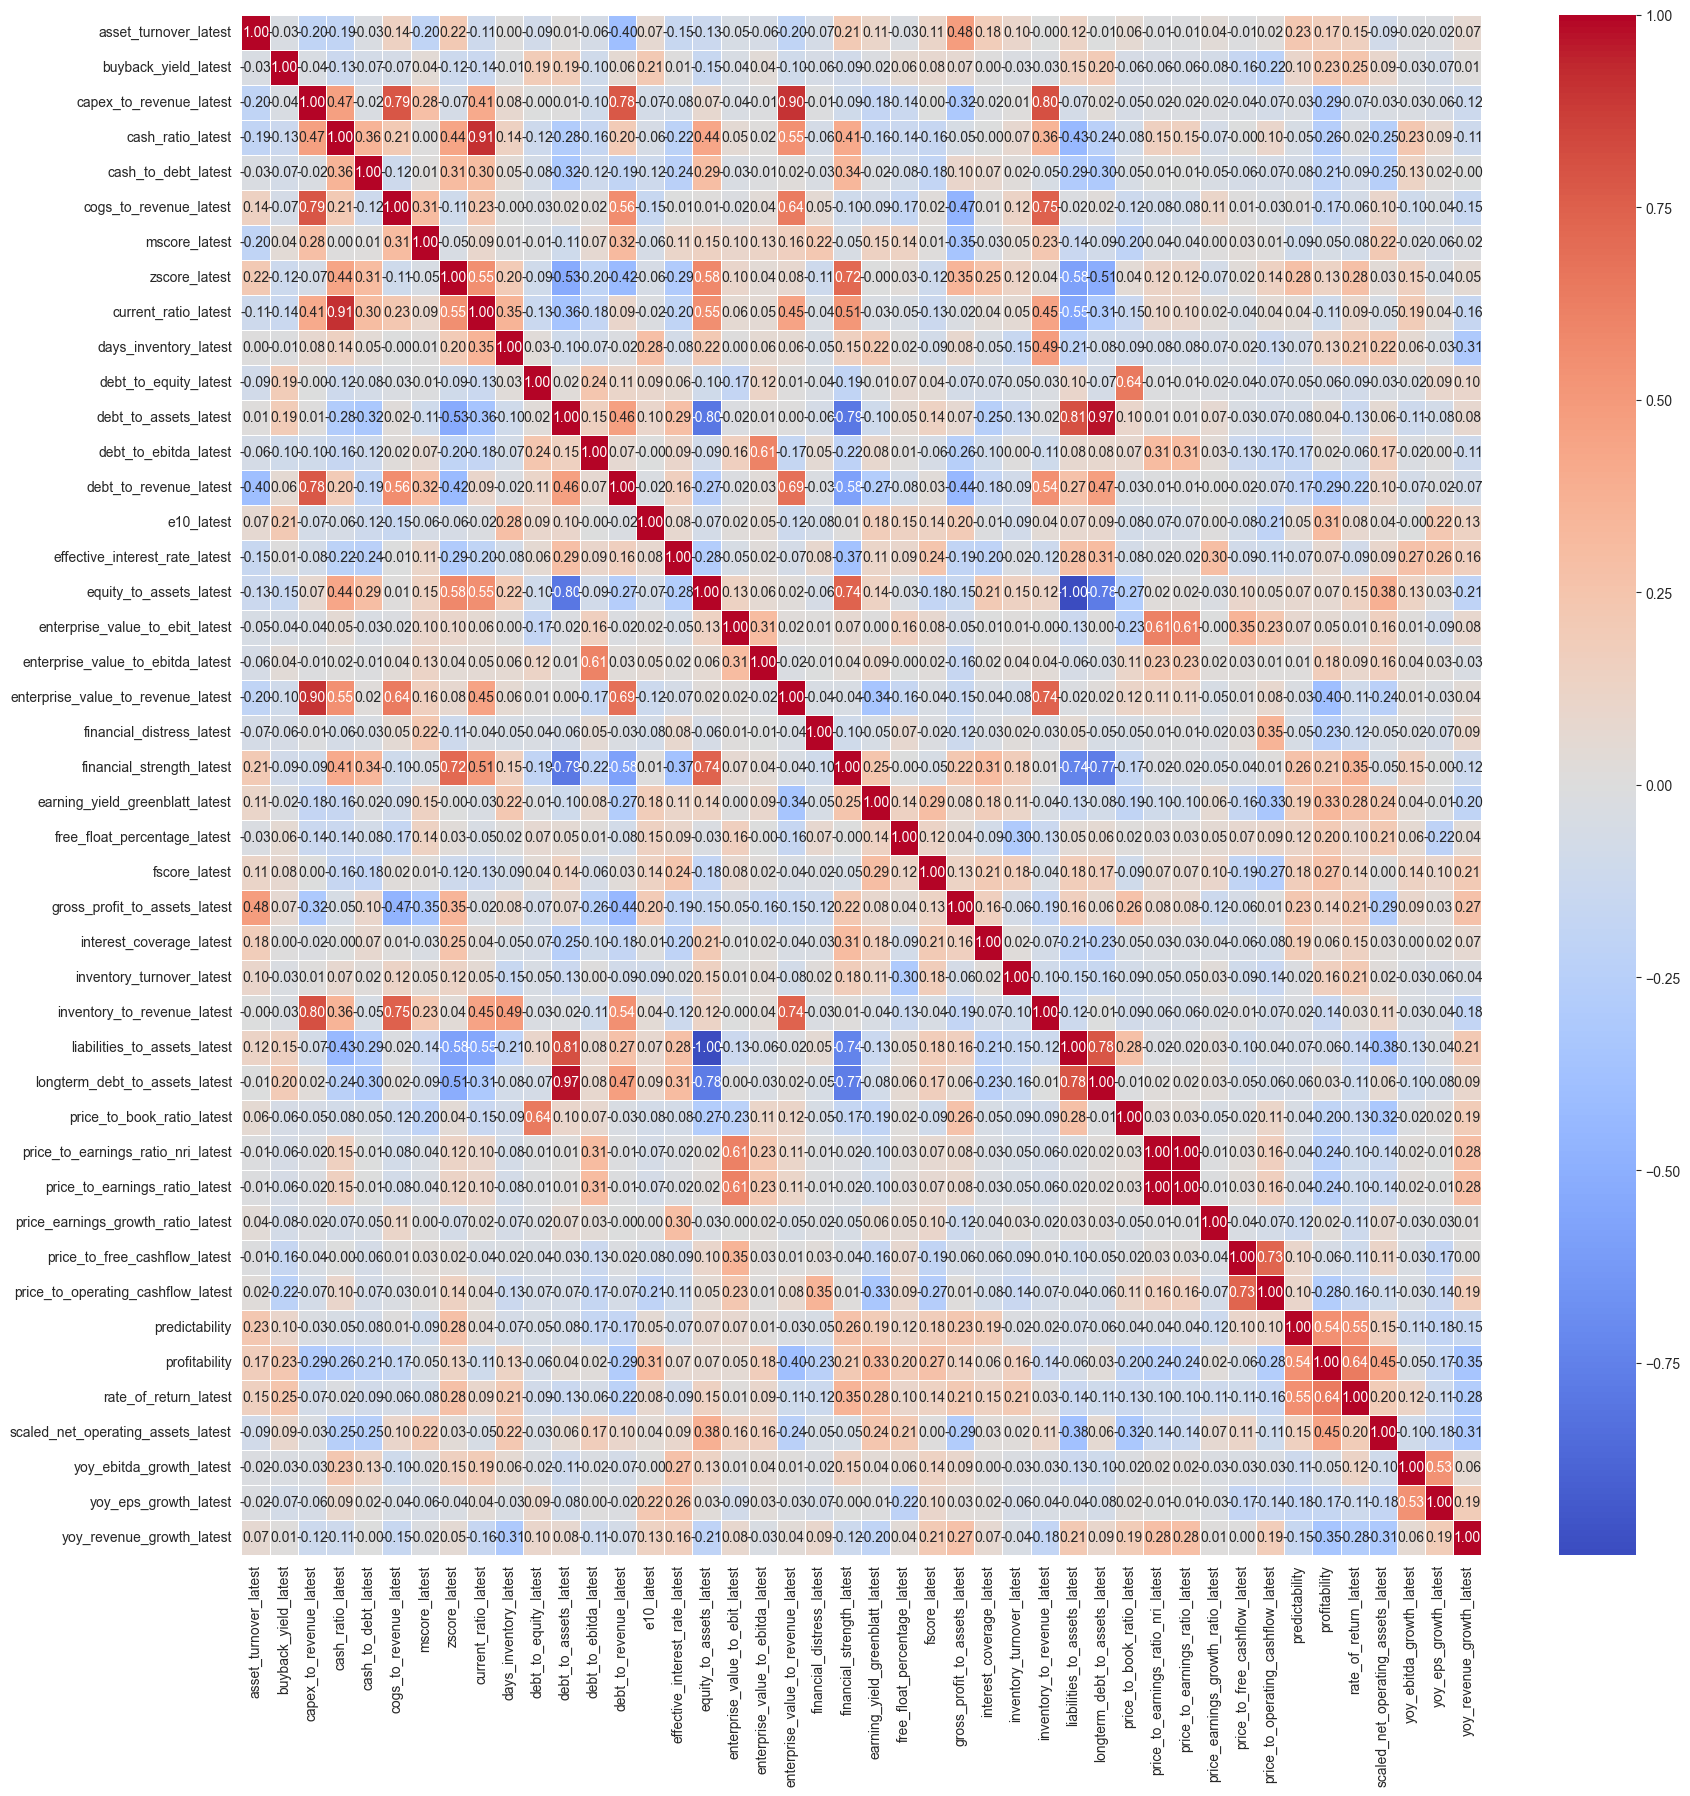

In [107]:
# создание общей корреляционной матрицы
correlation_matrix = data_latest.corr()
# создание тепловой карты
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.show()

*После изучения данных, наиболее интересным представляется анализ финансовой устойчивости компаний. Поэтому, в качестве возможной целевой переменной возьмем financial_strength_latest*

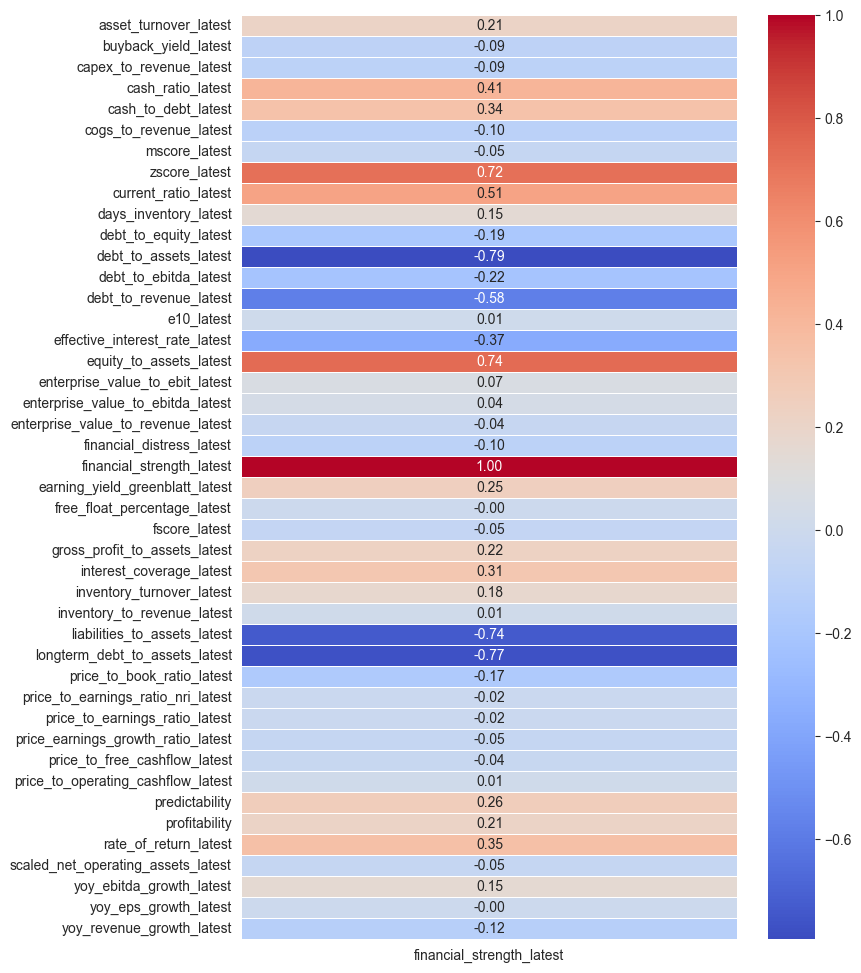

                                    financial_strength_latest
financial_strength_latest                            1.000000
debt_to_assets_latest                                0.794033
longterm_debt_to_assets_latest                       0.766357
equity_to_assets_latest                              0.739980
liabilities_to_assets_latest                         0.737718
zscore_latest                                        0.715549
debt_to_revenue_latest                               0.583207
current_ratio_latest                                 0.508204
cash_ratio_latest                                    0.412242
effective_interest_rate_latest                       0.372398
rate_of_return_latest                                0.353768
cash_to_debt_latest                                  0.339310
interest_coverage_latest                             0.310009
predictability                                       0.259577
earning_yield_greenblatt_latest                      0.248891
gross_pr

In [108]:


# выбор нужного столбца
target_column = "financial_strength_latest"
# корреляционная матрица для financial_strength_latest
correlation_matrix_target = data_latest.corr()[[target_column]]
# тепловая карта
plt.figure(figsize=(8, 12))
sns.heatmap(correlation_matrix_target, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.show()

# print по убыванию абсолютных значений корреляций
sorted_corr = correlation_matrix_target.abs().sort_values(by=target_column, ascending=False)
print(sorted_corr)


**Итак, вот описание целевой переменной и признаков для ее предсказания:**

**Опишем каждый признак и рассмотрим, как он может влиять на "financial_strength_latest" - целевая переменная:**
"financial_strength_latest" -- мера финансовой устойчивости компании. Она рассчитывается на основе различных финансовых показателей и предоставляет обобщенную оценку финансового здоровья организации. В данном случае, эта переменная используется как целевая для предсказания. Более высокие значения указывают на крепкую финансовую позицию, а низкие могут свидетельствовать о финансовых трудностях.

**Как влияют финансовые показатели на "financial_strength_latest":**
- debt_to_assets_latest, longterm_debt_to_assets_latest, liabilities_to_assets_latest: Положительная корреляция указывает на то, что увеличение доли долгосрочной задолженности, обязательств и общей задолженности относительно активов может снизить финансовую устойчивость.
- equity_to_assets_latest: Положительная корреляция говорит о том, что более высокая доля собственного капитала относительно активов может улучшить финансовую устойчивость.
- zscore_latest: Положительная корреляция с Z-оценкой свидетельствует о том, что более высокая Z-оценка (мера финансовой устойчивости) сопровождается более крепкой финансовой устойчивостью.
- debt_to_revenue_latest, current_ratio_latest, cash_ratio_latest: Положительная корреляция указывает на то, что увеличение задолженности к выручке, коэффициента текущей ликвидности и доли наличных средств может быть связано с повышением финансовой устойчивости.
- effective_interest_rate_latest: Положительная корреляция говорит о том, что более высокая эффективная процентная ставка может сказаться на ухудшении финансовой устойчивости.
- rate_of_return_latest: Положительная корреляция указывает на то, что более высокая ставка доходности связана с повышением финансовой устойчивости.
-cash_to_debt_latest, interest_coverage_latest, predictability, earning_yield_greenblatt_latest, gross_profit_to_assets_latest: Положительная корреляция с этими показателями также может указывать на повышение финансовой устойчивости.

Эти взаимосвязи помогают понять, какие аспекты финансов компании могут влиять на ее общую финансовую устойчивость.

**Вот числовые значения, соответствующие перечисленным признакам:**
1. **debt_to_assets_latest (Задолженность к активам)**: 0.794033
2. **longterm_debt_to_assets_latest (Долгосрочная задолженность к активам)**: 0.766357
3. **equity_to_assets_latest (Собственный капитал к активам)**: 0.739980
4. **liabilities_to_assets_latest (Обязательства к активам)**: 0.737718
5. **zscore_latest (Z-оценка)**: 0.715549
6. **debt_to_revenue_latest (Задолженность к выручке)**: 0.583207
7. **current_ratio_latest (Коэффициент текущей ликвидности)**: 0.508204
8. **cash_ratio_latest (Коэффициент покрытия долгов денежными средствами по текущим обязателствам)**: 0.412242
9. **effective_interest_rate_latest (Эффективная процентная ставка)**: 0.372398
10. **rate_of_return_latest (Ставка доходности)**: 0.353768
11. **cash_to_debt_latest (Денежные средства к общим долгам)**: 0.339310
12. **interest_coverage_latest (Покрытие процентов)**: 0.310009
13. **predictability (Предсказуемость)**: 0.259577
14. **earning_yield_greenblatt_latest (Доходность Greenblatt)**: 0.248891
15. **gross_profit_to_assets_latest (Чистая прибыль к активам)**: 0.222485
Эти значения представляют собой коэффициент корреляции между каждым из перечисленных признаков и целевой переменной "financial_strength_latest". Возможно использовать их для выбора наиболее значимых признаков при построении модели предсказания.

### Перед применением моделей предсказания, посмотрим на распеределение целевой переменной и призноков

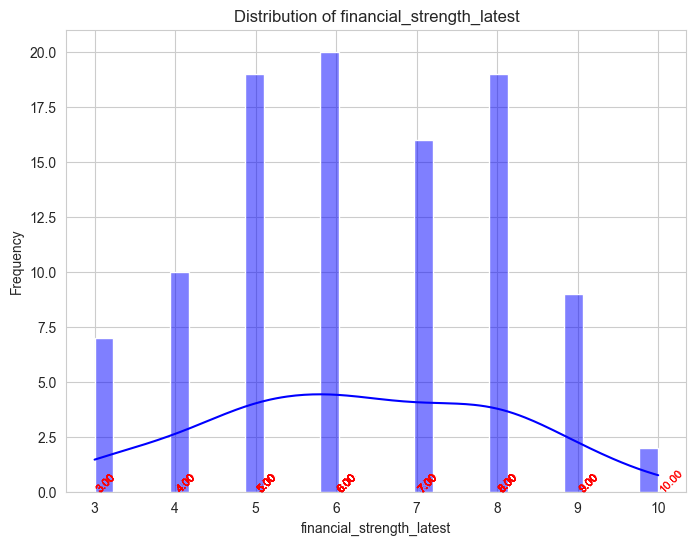

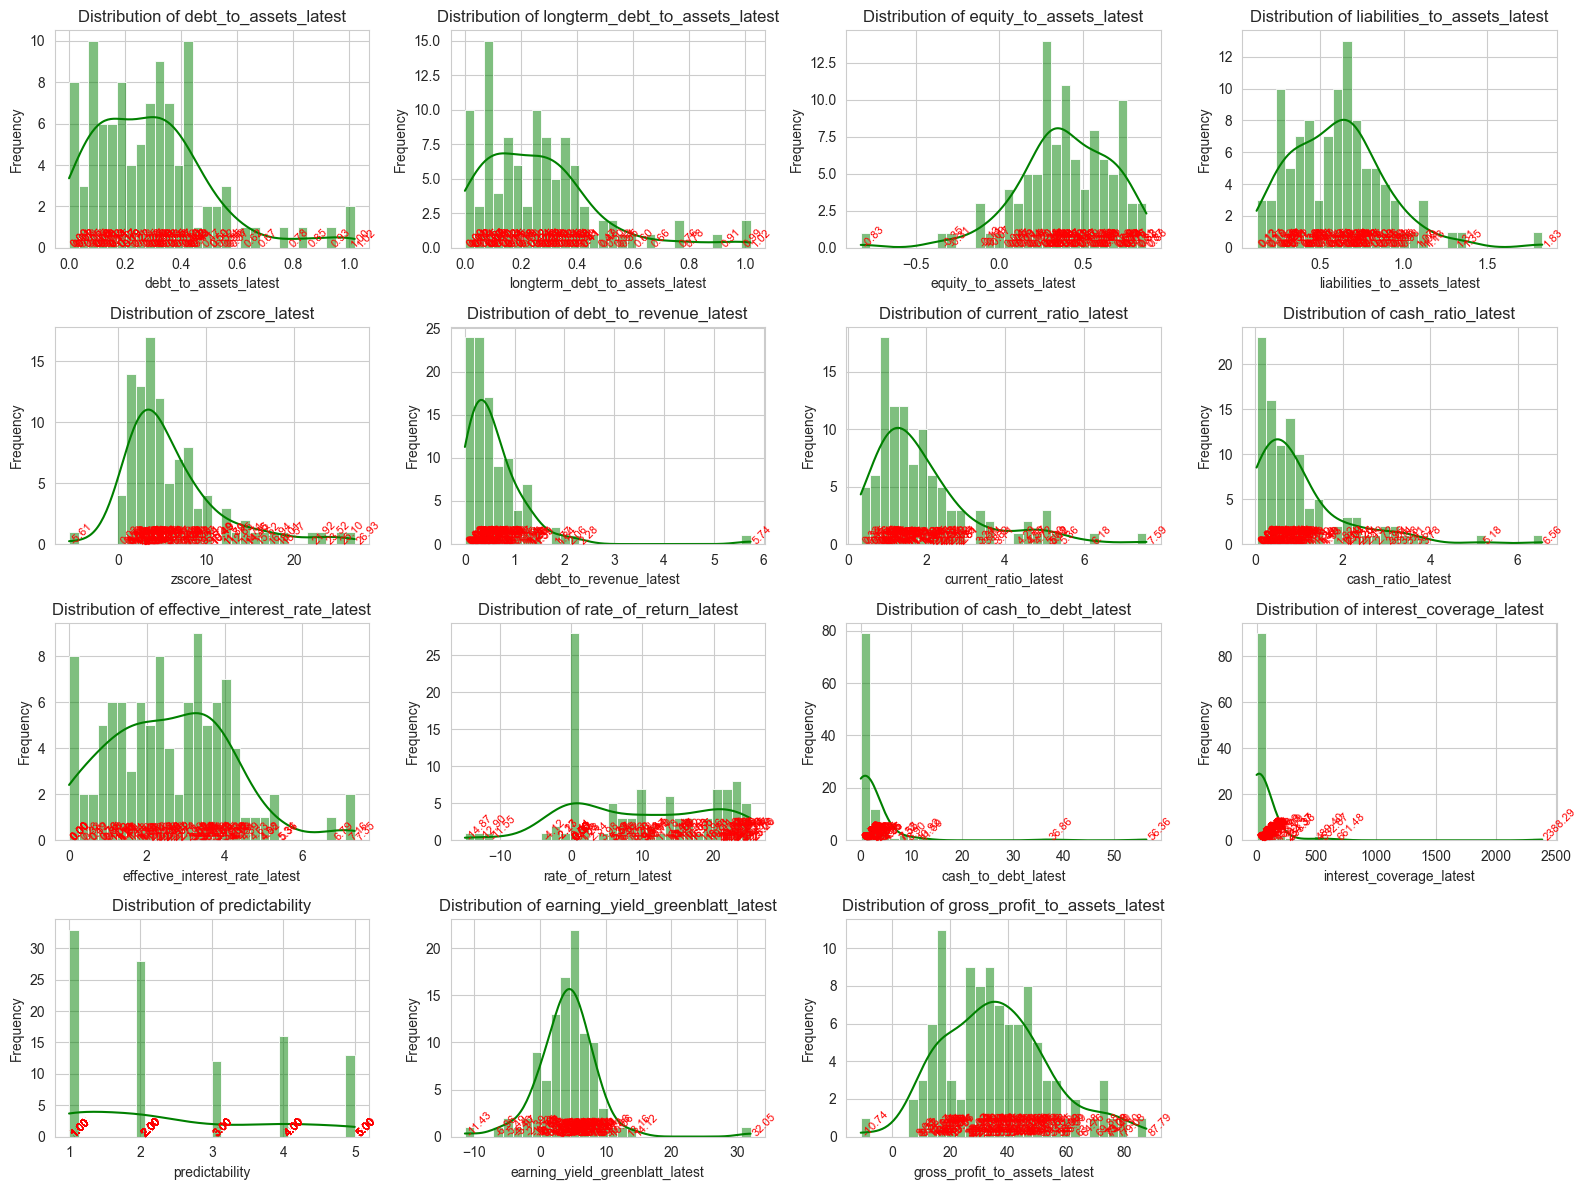

In [109]:
# построение гистограммы распределения целевой переменной
plt.figure(figsize=(8, 6))
sns.histplot(data_latest[target_column], bins=30, kde=True, color='blue')
plt.title(f'Distribution of {target_column}')
plt.xlabel(target_column)
plt.ylabel('Frequency')

# добавление значений к гистограмме
for value in data_latest[target_column]:
    plt.text(value, 0.01, f'{value:.2f}', rotation=45, color='red', fontsize=8)

plt.show()

# построение гистограмм распределения основных признаков
features_to_plot = ["debt_to_assets_latest", "longterm_debt_to_assets_latest", "equity_to_assets_latest",
                    "liabilities_to_assets_latest", "zscore_latest", "debt_to_revenue_latest",
                    "current_ratio_latest", "cash_ratio_latest", "effective_interest_rate_latest",
                    "rate_of_return_latest", "cash_to_debt_latest", "interest_coverage_latest",
                    "predictability", "earning_yield_greenblatt_latest", "gross_profit_to_assets_latest"]
plt.figure(figsize=(16, 12))
for feature in features_to_plot:
    plt.subplot(4, 4, features_to_plot.index(feature) + 1)
    sns.histplot(data_latest[feature].dropna(), bins=30, kde=True, color='green')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

    # добавление значений к гистограмме
    for value in data_latest[feature].dropna():
        plt.text(value, 0.01, f'{value:.2f}', rotation=45, color='red', fontsize=8)


plt.tight_layout()
plt.show()


**В целом, данные распределены нормально.**
### Для решения задачи регрессии выбраны следующие модели предсказания:
**Линейная регрессия:**
Применение: Линейная регрессия подходит, когда существует линейная зависимость между признаками и целевой переменной.
Преимущества: Простота, интерпретируемость, эффективность на больших объемах данных с линейной структурой.
Ограничения: Не учитывает сложные нелинейные зависимости.
**Градиентный бустинг (Gradient Boosting):**
Применение: Градиентный бустинг эффективен в построении сложных моделей, объединяя слабые модели в сильную.
Преимущества: Высокая точность, способность работать с разнообразными данными, способность учесть нелинейные зависимости.
Ограничения: Более сложная настройка параметров, потенциальная склонность к переобучению.
**Случайный лес (Random Forest):**
Применение: Случайный лес хорошо работает в случае сложных зависимостей, включая взаимодействия между признаками.
Преимущества: Устойчивость к переобучению, хорошая производительность на разнообразных типах данных.
Ограничения: Может быть менее интерпретируемым по сравнению с линейными моделями.

In [110]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
# перечень признаков, для предсказания
selected_features = [
    'debt_to_assets_latest',
    'longterm_debt_to_assets_latest',
    'equity_to_assets_latest',
    'liabilities_to_assets_latest',
    'zscore_latest',
    'debt_to_revenue_latest',
    'current_ratio_latest',
    'cash_ratio_latest',
    'effective_interest_rate_latest',
    'rate_of_return_latest',
    'cash_to_debt_latest',
    'interest_coverage_latest',
    'earning_yield_greenblatt_latest',
    'gross_profit_to_assets_latest'
]

#  матрица признаков X и вектора целевой переменной y
X = data_latest[selected_features]
y = data_latest['financial_strength_latest']

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred_lr = model.predict(X_test)

mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f'Mean Squared Error (LinearRegression): {mse_lr}')
print(f'R-squared (LinearRegression): {r2_lr}')

Mean Squared Error (LinearRegression): 0.6455896136256274
R-squared (LinearRegression): 0.7515663005157925


*Модель линейной регрессии имеет довольно хороший коэффициент детерминации R-squared, который равен 0.75. Это говорит о том, что около 75% дисперсии целевой переменной (financial_strength_latest) может быть объяснено моделью.*

In [112]:
from sklearn.ensemble import GradientBoostingRegressor
# инициализация и обучение модели градиентного бустинга
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)

y_pred_gb = gb_model.predict(X_test)

# оценка производительности модели
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print(f'Mean Squared Error (Gradient Boosting): {mse_gb}')
print(f'R-squared (Gradient Boosting): {r2_gb}')

Mean Squared Error (Gradient Boosting): 0.4878138391977351
R-squared (Gradient Boosting): 0.8122810618794056


*Градиентный бустинг показывает более высокую способность объяснения вариации в данных по сравнению с линейной регрессией*

In [113]:
from sklearn.ensemble import RandomForestRegressor
# инициализация и обучение модели случайного леса
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
# предсказания на тестовом наборе
y_pred_rf = rf_model.predict(X_test)
# оценка производительности модели
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Mean Squared Error (Random Forest): {mse_rf}')
print(f'R-squared (Random Forest): {r2_rf}')

Mean Squared Error (Random Forest): 0.4811333333333333
R-squared (Random Forest): 0.814851832460733


*Результаты для модели случайного леса (Random Forest) также выглядят хорошо. В данном случае результаты для градиентного бустинга и случайного леса примерно схожи. Но  Random Forest немного лучше, поэтому ниже будет  представлен тюнинг модели Random Forest.*

**Создадим:**
 - точечный график между фактическими и предсказанными значениями. Если предсказания идеальны, точки на графике следуют по прямой линии под углом 45 градусов.
  - и график распределения остатков. Остаток - это разница между фактическим значением (наблюдаемым) и предсказанным значением (рассчитанным моделью). Идеальный случай - нормальное распределение остатков вокруг нуля.

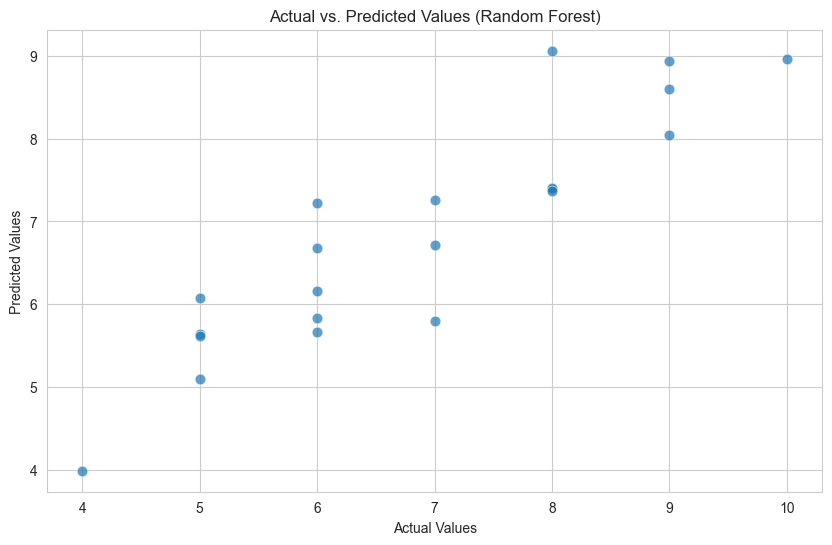

In [114]:
# создание DataFrame с фактическими и предсказанными значениями
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_rf})

# график фактических vs. предсказанных значений
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual', y='Predicted', data=results_df, alpha=0.7, s=60)
plt.title('Actual vs. Predicted Values (Random Forest)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()


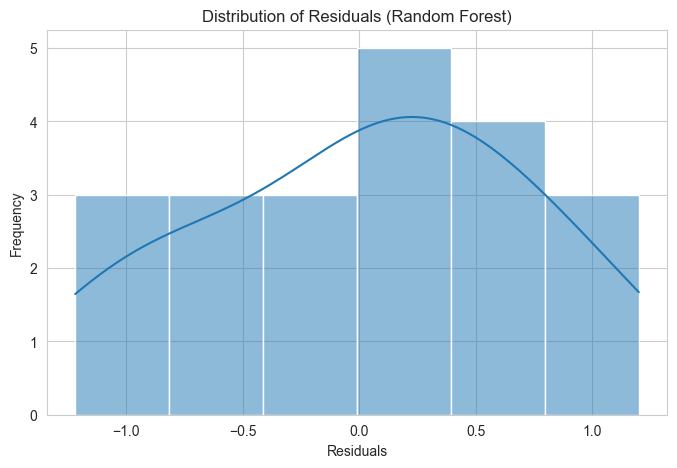

In [115]:
# распределение остатков
residuals = y_test - y_pred_rf
plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals (Random Forest)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()


**Предупреждение**
*Код, представленный в ячейке ниже, исполняется довольно долго*
*Закомментированные param_grid - это эксперименты со структурой дерева*

In [116]:
#  тюнинг модели Random Forest
from sklearn.model_selection import GridSearchCV

rf_model = RandomForestRegressor(random_state=42)
# Задание сетки гиперпараметров для перебора
# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [None, 10, 20],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': ['auto', 'sqrt', 'log2']
# }
# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [None, 10, 20],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': ['auto', 'sqrt', 'log2', None]
# }
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2', None, 1, 2, 4]  # добавлены числ.значения. Этот вариант дал лучшие результаты
}
# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [5, 10, 15],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': ['auto', 'sqrt', None]
# }

# инициализация GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)

print("Best Parameters: ", grid_search.best_params_)

# предсказания на тестовом наборе с использованием лучших параметров
y_pred_rf_tuned = grid_search.best_estimator_.predict(X_test)
# оценка производительности модели после тюнинга
mse_rf_tuned = mean_squared_error(y_test, y_pred_rf_tuned)
r2_rf_tuned = r2_score(y_test, y_pred_rf_tuned)

print(f'Mean Squared Error (Tuned Random Forest): {mse_rf_tuned}')
print(f'R-squared (Tuned Random Forest): {r2_rf_tuned}')

Best Parameters:  {'max_depth': None, 'max_features': 4, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Mean Squared Error (Tuned Random Forest): 0.3665142857142855
R-squared (Tuned Random Forest): 0.858959162303665


C:\Users\IndServ\PycharmProjects\pythonProject\venv\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
405 fits failed out of a total of 2835.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
405 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\IndServ\PycharmProjects\pythonProject\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\IndServ\PycharmProjects\pythonProject\venv\lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "C:\Users\IndServ\PycharmProjects\pythonProject\venv\lib\site-packages\sklearn\base.py", line 

**Результаты, которые получились после тюнинга Random Forest Regressor, с помощью GridSearchCV выглядят неплохо:**
- Лучшие параметры:
max_depth: None
max_features: 4
min_samples_leaf: 1
min_samples_split: 2
n_estimators: 100
- Среднеквадратичная ошибка (Mean Squared Error):0.3665
MSE измеряет среднеквадратичное отклонение прогнозов от фактических значений. Чем ближе значение MSE к нулю, тем лучше.
- R-квадрат (R-squared):0.858959
R-squared измеряет объясненную дисперсию модели. Значение близкое к 1 указывает на хорошее соответствие модели данным.
**Вывод: модель RandomForestRegressor после тщательного подбора гиперпараметров проявляет высокую предсказательную способность. Такие значения MSE и R-squared свидетельствуют о том, что модель хорошо работает на этих данных**
*Также в ходе экспериметов с гиперпараметрами, было протестирован RandomizedSearchCV. Были получены следующие значения: Best Parameters:  {'max_depth': 40, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 160}
R-squared (RandomizedSearchCV): 0.8186542300381308; Mean Squared Error (RandomizedSearchCV): 0.47125227296213634*

**Сравним метрики производительности:
Построим графики сравнения метрик производительности (MSE, R-squared) для всех моделей на одном графике.**

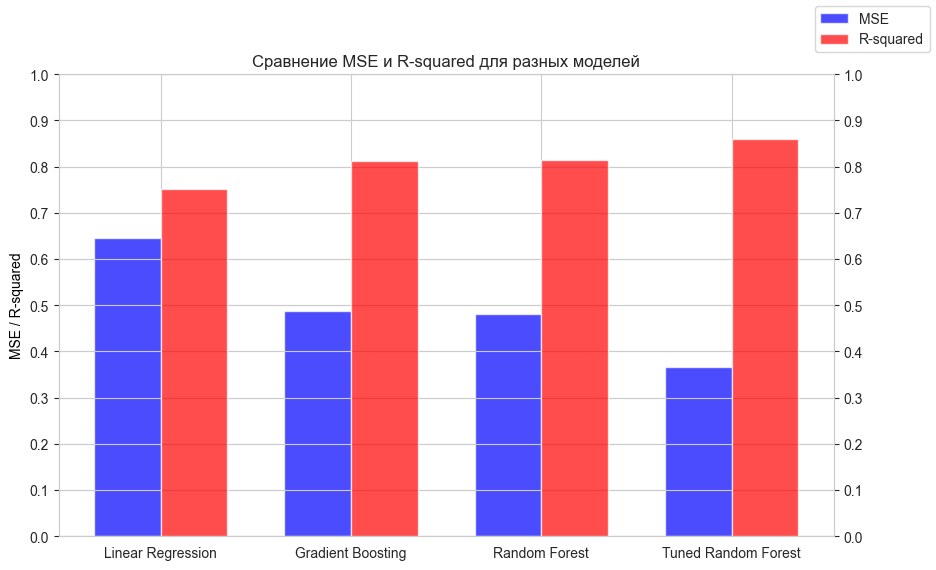

In [117]:
# Значения метрик
# mse_values = [0.6455896136256274, 0.4878138391977351, 0.4811333333333333, 0.3665142857142855]
# r2_values = [0.7515663005157925, 0.8122810618794056, 0.814851832460733, 0.858959162303665]
mse_values = [mse_lr, mse_gb, mse_rf, mse_rf_tuned]
r2_values = [r2_lr, r2_gb, r2_rf, r2_rf_tuned]
models = ['Linear Regression', 'Gradient Boosting', 'Random Forest', 'Tuned Random Forest']
# создание индексов для позиционирования баров
ind = np.arange(len(models))
# ширина баров
width = 0.35
# график
fig, ax1 = plt.subplots(figsize=(10, 6))
# бары для MSE
rects1 = ax1.bar(ind - width/2, mse_values, width, label='MSE', color='b', alpha=0.7)
# ось для R-squared
ax2 = ax1.twinx()
# бары для R-squared
rects2 = ax2.bar(ind + width/2, r2_values, width, label='R-squared', color='r', alpha=0.7)
#  легенда
ax1.set_ylabel('MSE / R-squared', color='k')
fig.legend(loc="upper right")
# метки для оси X и графика
ax1.set_xticks(ind)
ax1.set_xticklabels(models)
# метки для оси Y
ax1.set_yticks(np.arange(0, 1.1, 0.1))
ax2.set_yticks(np.arange(0, 1.1, 0.1))

plt.title('Сравнение MSE и R-squared для разных моделей')

# plt.show()
plt.savefig('C:/main/hse/machine _learning/project_ML/model_comparison.png')



**Важность признаков (Feature Importance):
Построим график важности признаков. Это позволяет определить, какие признаки оказывают наибольшее влияние на предсказания.**

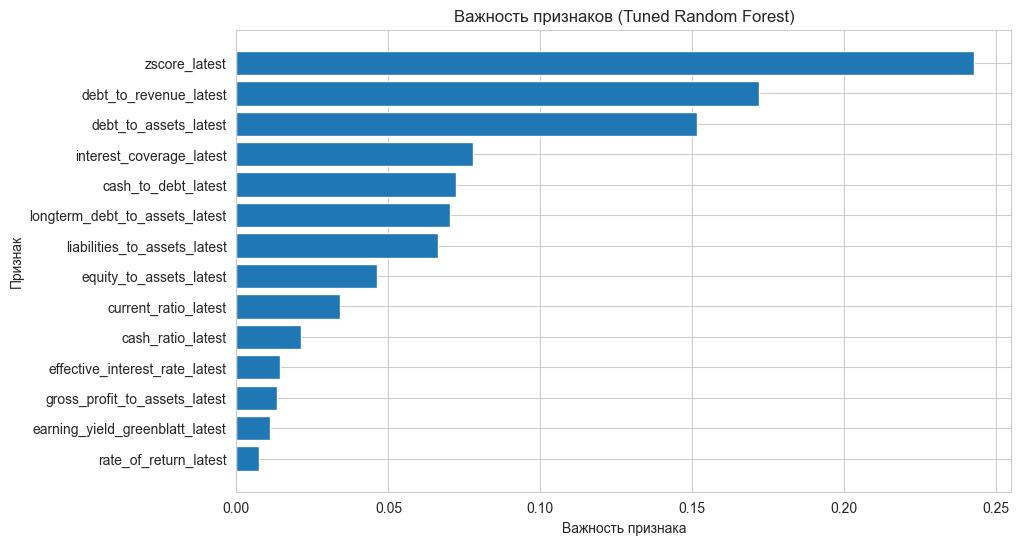

In [118]:
# получение важности признаков из модели с наилучшими параметрами
feature_importance_best = grid_search.best_estimator_.feature_importances_
# получение названий признаков
feature_names = X_train.columns
# сортировка признаков по важности
sorted_idx_best = feature_importance_best.argsort()

# график важности признаков для модели с наилучшими параметрами
plt.figure(figsize=(10, 6))

plt.barh(range(len(sorted_idx_best)), feature_importance_best[sorted_idx_best])

plt.yticks(range(len(sorted_idx_best)), feature_names[sorted_idx_best])
plt.xlabel('Важность признака')
plt.ylabel('Признак')
plt.title('Важность признаков (Tuned Random Forest)')
#plt.show()
plt.savefig('C:/main/hse/machine _learning/project_ML/feature_importance.png',dpi=300)


### ВЫВОДЫ:
**В целом, задача машинного обучения решена. Полученные результаты позволяют с приемлемой точностью предсказывать "financial_strength_latest" -- меру финансовой устойчивости компании**
**Результаты модели имеют смысл с точки зрения бизнес-контекста. Признаки, влияющие на модель это подтверждают.**
- Например, влияние признака zscore_latest (Altman Z-Score) — это коэффициент, разработанный профессором Эдвардом Альтманом в 1968 году, который позволяет оценить финансовую устойчивость компании и её вероятность банкротства.
Он основан на финансовых показателях компании и может использоваться для принятия инвестиционных решений и анализа рисков.
Коэффициент Z-Score показывает вероятность банкротства компании в ближайшем будущем и основан на пяти финансовых показателях:
- капитализации;
- прибыли;
- общей задолженности;
- текущих активах;
- текущих обязательствах.
Более высокий показатель означает, что компания более устойчива финансово, а менее высокий — наоборот.